<a href="https://colab.research.google.com/github/Datanerd97/PyTorch/blob/main/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.6.0+cu124


'cpu'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

3 Methods for preventing underfitting for our model is to collect more training data, train more epochs so that the model gets more chance at looking at the data. Increase the # of hidden layers, so the model could be more complex to understand the data. Or we can increase the NN architecture so that the model itself is more complex to handle the complexity of the data.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

The following steps will be very similiar no matter what data you are working with.

In [ ]:
# 1. Get data

import requests
import zipfile
from pathlib import Path

# We first setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder does not exist, download it and prepare it

if image_path.is_dir():
  print(f"{image_path} directory already exist.... skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents = True,exist_ok = True)

# Download pizza,steak and sushi data..

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak and sushi data..")
  f.write(request.content)

# Unzip pizza,steak and sushi data.
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza,steak and sushi data")
  zip_ref.extractall(image_path)


data/pizza_steak_sushi directory already exist.... skipping download
Unzipping pizza,steak and sushi data


The whole premise of this entire section will be loading this data or just images for Pytorch.

-------------------

We wrote some code to download a target dataset for our own custom dataset from the Python Deep Learning Directory. We took data from the Food 101 Dataset.

In [ ]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.


In [ ]:
# Setup train and testing paths

train_dir = image_path / "train"
test_dir = image_path / "test"


train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

The premise still remains the same:

-Write code to get your data into Tensors for use with Pytorch

- As you start to work with more datasets, you will realize that there are standardized ways of storing specific types of data.

The steps to writing code are:

- Get all of the image paths
- Pick a random image path using python's random.choice()
- Get the image class name using `pathlib.Path.parent.stem`
- Open The Image using Python's PIL
- Show the Image and print meta data

data/pizza_steak_sushi/train/pizza/1947572.jpg
pizza
Random Image Path: data/pizza_steak_sushi/train/pizza/1947572.jpg
Image Class: pizza
Image Height 512
Image width 512


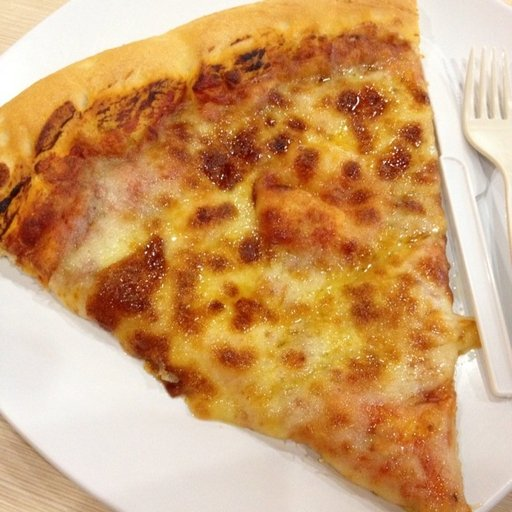

In [ ]:
# Visualize an image

import random
from PIL import Image


# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path

random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image classes from path name
# (Image class is the name of the directory where the image is stored)

image_class = random_image_path.parent.stem
print(image_class)

# 4. Open Image
img = Image.open(random_image_path)

# 5. print Metadata

print(f"Random Image Path: {random_image_path}")
print(f"Image Class: {image_class}")
print(f"Image Height {img.height}")
print(f"Image width {img.width}")
img


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

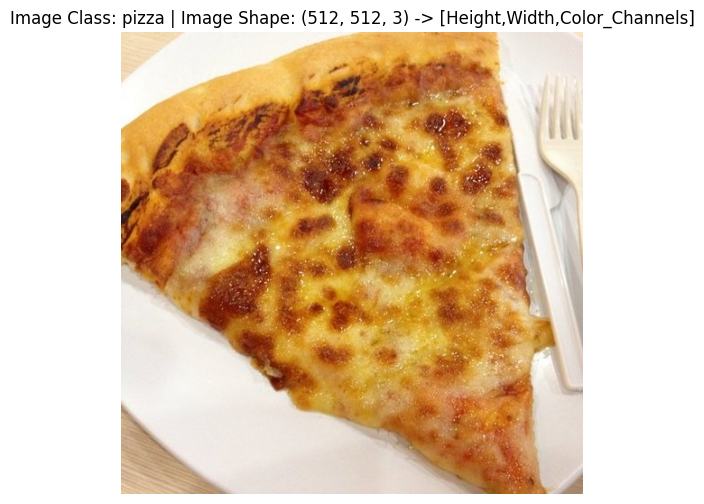

In [ ]:
# Do the image visualization with matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Turn The Image into an Array

img_as_array = np.asarray(img)

# Plot it with matplotlib
plt.figure(figsize = (8,6))
plt.imshow(img_as_array)
plt.title(f"Image Class: {image_class} | Image Shape: {img_as_array.shape} -> [Height,Width,Color_Channels]")
plt.axis(False)

Recall that the order here is the default for PIL Library which is color channels last. But the Pytorch defaults to color channels first.

-----

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors (Numerical Representation of our images..)
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [ ]:
# 3.1 Transforming data with torchvision.transforms

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# Write transform for turning images into tensors

data_transform = transforms.Compose([
    # Resize our images to 64 by 64
    transforms.Resize(size = (64,64)),
    # Flip the images randomly
    transforms.RandomHorizontalFlip(p = 0.5),

    # Turn The Image Into a Tensor
    transforms.ToTensor()
])

----

Transforms are common image transformations. They can be chained together using Compose. Additonally, there is the torchvision.transforms.functional module. Functional transforms give fine-grained control over the transformations. This is useful if you have to build a more complext transformation pipeline.

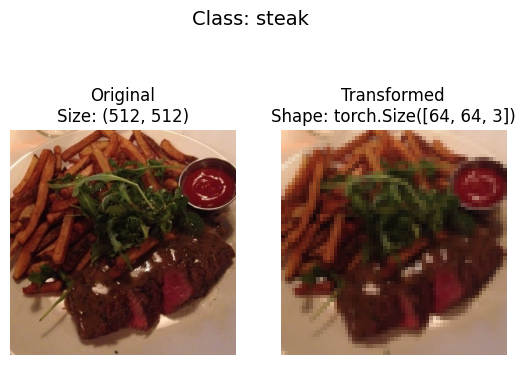

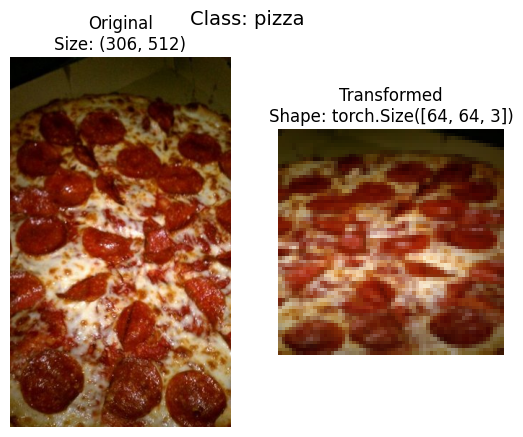

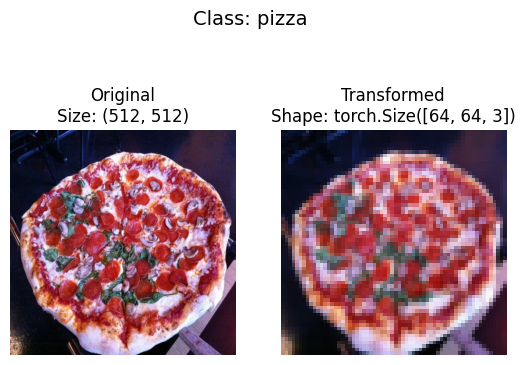

In [ ]:
# Write a function to plot transformed images

def plot_transformed_images(image_paths: list, transform, n = 3, seed = None):
  """

  Selects random images from a path of images and loads/transforms then plot the original vs
  the transformed version

  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k = n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig,ax = plt.subplots(nrows = 1, ncols = 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

    # Transform and plot target Image

    # We have the first axis come in the zero dim, and second axis is in the first dim spot, and
    # Then zero is gonna be at the third dimension spot (8:30)
    transformed_image = transform(f).permute(1,2,0) # We need to change shape for Matplotlib (C,H,W) -> (H,W,C)
    ax[1].imshow(transformed_image)
    ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
    ax[1].axis("off")

    # We are going to get the parent attributes or the stem attribute from that to get the class name
    fig.suptitle(f"Class: {image_path.parent.stem}",fontsize = 14)


plot_transformed_images(image_paths = image_path_list,
                       transform = data_transform,
                       n = 3,
                       seed = 25)




Note: We are going to have to permute or change the color channels to make them come first. So we use the permute argument.

Note: The size of the image is now the same shape as the image size the CNN model takes in

Check CNN explainer website for more details:

64 by 64 there is less information encoded in this image, so our model will be able to compute faster on images of this size. However, we may lose some performance because not as much information is encoded as the original image.

The size of an image is something that you can control. It is a hyperparameter that you can tune the size to see if it improves your model.

-------

### Load image data using `ImageFolder`

Option 1: Loading Image Data using ImageFolder

We can load image classification data using `torchvision.datasets.ImageFolder`

In [ ]:
# Use ImageFolder to create dataset(s)

from torchvision import datasets

train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform,
                                  target_transform = None)
test_data = datasets.ImageFolder(root = test_dir,
                                 transform = data_transform)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

So we have a dataset, a torch dataset which is an image folder, and we have a number of data points. For the training dataset we have 225 so about 75 images per class. We have the root location which is the folder we have loaded them in from, which is our training directory. And then we have a transform here, which is a standard transform, a resize followed by a random horizontal flip followed by two tensors.

Then we basically have the same ouput for our test directory, except we have less samples here.

------

In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

----

A DataLoader is going to help us turn our dataset into Iterables and we can customize the batch_size so our model can see batch_size images at a time.

We can turn them into a dataloader so that our model looks at 32 images at a time and we can leverage all the memory it has rather than running out of Memory.

In [ ]:
# Turn train and test Datasets into DataLoaders

from torch.utils.data import DataLoader

"""
Number of Worker is this going to be how many cores or how many CPU cores that is used to load your data.

The higher the better usually, which will count how many cpu your compute hardware has.

We are going to shuffle the training data because we do not want the model to recognize any order in the training data. So we mix it up.

"""

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = 1,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = 1,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78e003357050>,
 <torch.utils.data.dataloader.DataLoader at 0x78e0034dba50>)

In [ ]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(8, 3)

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [ ]:
# Let's create a class TinyVGG

class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer.

  """

  def __init__(self,input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels = input_shape,
                    out_channels = hidden_units,
                    kernel_size = 3,
                    stride = 1,
                    padding = 0),
          nn.ReLU(),
          nn.Conv2d(in_channels = hidden_units,
                    out_channels = hidden_units,
                    kernel_size = 3,
                    stride = 1,
                    padding = 0),
          nn.MaxPool2d(kernel_size = 2,
                       stride = 2) # Default stride value is same as kernel_size

      )
      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(in_channels = hidden_units,
                    out_channels = hidden_units,
                    kernel_size = 3,
                    stride = 1,
                    padding = 0),
          nn.ReLU(),
          nn.Conv2d(in_channels = hidden_units,
                    out_channels = hidden_units,
                    kernel_size = 3,
                    stride = 1,
                    padding = 0),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 2,
                       stride = 2) # default stride value is same as kernel_size

      )
      self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 13 * 13,
                  out_features = output_shape)
    )

  # Do a forward method
  def forward(self,x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x


In [ ]:
torch.manual_seed(2443)
model_0 = TinyVGG(input_shape = 3, # of color channels in our image,
hidden_units = 10,
output_shape = len(class_names))

In [ ]:
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

## 4. Create training and testing functions for `model_0`.

-`train_step` - takes in a model and dataloader and trains the model on the dataloader


In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X,y) in enumerate(dataloader):
    # Send data to target device
    X = X.to(device)
    y = y.to(device)

    # 1. Forward pass
    y_pred = model(X)
    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred,y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()


    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred,dim = 1),dim = 1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X,y) in enumerate(dataloader):
      # Send data to target device
      X = X.to(device)
      y = y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred_logits,y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim = 1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss,test_acc

In [ ]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [ ]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(train_data.classes))

# Setup a loss function and an optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr=0.001)

# Start The Timer
from timeit import default_timer as timer
start_time = timer()


# Train model_0
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader,
                        test_dataloader = test_dataloader,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS)
end_time = timer()
print(f"Total Training Time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1065 | train_acc: 0.3008 | test_loss: 1.0991 | test_acc: 0.2708
Epoch: 2 | train_loss: 1.0988 | train_acc: 0.3008 | test_loss: 1.0803 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.0888 | train_acc: 0.5117 | test_loss: 1.0768 | test_acc: 0.5739
Epoch: 4 | train_loss: 1.0972 | train_acc: 0.3789 | test_loss: 1.0513 | test_acc: 0.6146
Epoch: 5 | train_loss: 1.0736 | train_acc: 0.3750 | test_loss: 1.0762 | test_acc: 0.3608
Total Training Time: 9.775 seconds


In [ ]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set Number of Epochs
NUM_EPOCHS = 20

# Recreate an Instance of TinyVGG
model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(train_data.classes))

# Setup a loss function and an optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_results = train(model = model_0,
                      train_dataloader = train_dataloader,
                      test_dataloader = test_dataloader,
                      optimizer = optimizer,
                      loss_fn = loss_fn,
                      epochs = NUM_EPOCHS)
end_time = timer()

print(f"Total Training Time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1065 | train_acc: 0.3008 | test_loss: 1.0991 | test_acc: 0.2708
Epoch: 2 | train_loss: 1.0988 | train_acc: 0.3008 | test_loss: 1.0803 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.0888 | train_acc: 0.5117 | test_loss: 1.0768 | test_acc: 0.5739
Epoch: 4 | train_loss: 1.0972 | train_acc: 0.3789 | test_loss: 1.0513 | test_acc: 0.6146
Epoch: 5 | train_loss: 1.0736 | train_acc: 0.3750 | test_loss: 1.0762 | test_acc: 0.3608
Epoch: 6 | train_loss: 1.0387 | train_acc: 0.4102 | test_loss: 0.9920 | test_acc: 0.6146
Epoch: 7 | train_loss: 1.0295 | train_acc: 0.4258 | test_loss: 0.9271 | test_acc: 0.6042
Epoch: 8 | train_loss: 0.9518 | train_acc: 0.5508 | test_loss: 1.0071 | test_acc: 0.3826
Epoch: 9 | train_loss: 0.9185 | train_acc: 0.5938 | test_loss: 1.1245 | test_acc: 0.3523
Epoch: 10 | train_loss: 0.9782 | train_acc: 0.4844 | test_loss: 0.9935 | test_acc: 0.4025
Epoch: 11 | train_loss: 0.8638 | train_acc: 0.5000 | test_loss: 0.9659 | test_acc: 0.5938
Epoch: 12 | train_l

In [ ]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 50

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(train_data.classes))


# Setup a loss function and an optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

# Start The Timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader,
                        test_dataloader = test_dataloader,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS)

# ENd The timer and print out how long it took
end_timer = timer()

print(f"Total Training Time: {end_timer-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1065 | train_acc: 0.3008 | test_loss: 1.0991 | test_acc: 0.2708
Epoch: 2 | train_loss: 1.0988 | train_acc: 0.3008 | test_loss: 1.0803 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.0888 | train_acc: 0.5117 | test_loss: 1.0768 | test_acc: 0.5739
Epoch: 4 | train_loss: 1.0972 | train_acc: 0.3789 | test_loss: 1.0513 | test_acc: 0.6146
Epoch: 5 | train_loss: 1.0736 | train_acc: 0.3750 | test_loss: 1.0762 | test_acc: 0.3608
Epoch: 6 | train_loss: 1.0387 | train_acc: 0.4102 | test_loss: 0.9920 | test_acc: 0.6146
Epoch: 7 | train_loss: 1.0295 | train_acc: 0.4258 | test_loss: 0.9271 | test_acc: 0.6042
Epoch: 8 | train_loss: 0.9518 | train_acc: 0.5508 | test_loss: 1.0071 | test_acc: 0.3826
Epoch: 9 | train_loss: 0.9185 | train_acc: 0.5938 | test_loss: 1.1245 | test_acc: 0.3523
Epoch: 10 | train_loss: 0.9782 | train_acc: 0.4844 | test_loss: 0.9935 | test_acc: 0.4025
Epoch: 11 | train_loss: 0.8638 | train_acc: 0.5000 | test_loss: 0.9659 | test_acc: 0.5938
Epoch: 12 | train_l

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [ ]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 20, # double the # of hidden units here
                  output_shape = len(train_data.classes))

# Setup a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.001)

# Start timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader,
                        test_dataloader = test_dataloader,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS)
# End Timer
end_time = timer()
print(f"Total Training Time: {end_time-start_time:.3f} seconds")


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1005 | train_acc: 0.4180 | test_loss: 1.0964 | test_acc: 0.2917
Epoch: 2 | train_loss: 1.0976 | train_acc: 0.3125 | test_loss: 1.0936 | test_acc: 0.2708
Epoch: 3 | train_loss: 1.0893 | train_acc: 0.4023 | test_loss: 1.0542 | test_acc: 0.3523
Epoch: 4 | train_loss: 1.1130 | train_acc: 0.3594 | test_loss: 1.0549 | test_acc: 0.3930
Epoch: 5 | train_loss: 0.9901 | train_acc: 0.4648 | test_loss: 1.1128 | test_acc: 0.1979
Epoch: 6 | train_loss: 0.9205 | train_acc: 0.5234 | test_loss: 1.0739 | test_acc: 0.3021
Epoch: 7 | train_loss: 0.8312 | train_acc: 0.6484 | test_loss: 1.2050 | test_acc: 0.3835
Epoch: 8 | train_loss: 0.8426 | train_acc: 0.6484 | test_loss: 1.1111 | test_acc: 0.4943
Epoch: 9 | train_loss: 0.8554 | train_acc: 0.6602 | test_loss: 1.0459 | test_acc: 0.4242
Epoch: 10 | train_loss: 0.9604 | train_acc: 0.4961 | test_loss: 0.9163 | test_acc: 0.5843
Epoch: 11 | train_loss: 0.8692 | train_acc: 0.5781 | test_loss: 0.9358 | test_acc: 0.5331
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [ ]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi_20_percent directory exists.
Unzipping pizza, steak, sushi 20% data...


In [ ]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.


Excellent, we now have double the training and testing images...

In [ ]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [ ]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets (No need for custom training set..)
train_data = datasets.ImageFolder(root = train_data_20_percent_path,
                                  transform = data_transform,
                                  target_transform = None)

test_data = datasets.ImageFolder(root = test_data_20_percent_path,
                                 transform = data_transform)

# Create dataloaders
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = 1,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = 1,
                             shuffle = False)

In [ ]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an Instance of TinyVGG
model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 20, # Double the hidden units
                  output_shape = len(train_data.classes))

# Setup a loss function and an optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

# Start Timer
from timeit import default_timer as timer
start_time = timer()

# Train the model
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader,
                        test_dataloader = test_dataloader,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS)

# End Timer
end_time = timer()
print(f"Total Training Time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0852 | train_acc: 0.3583 | test_loss: 1.0488 | test_acc: 0.5102
Epoch: 2 | train_loss: 1.0102 | train_acc: 0.4958 | test_loss: 1.0101 | test_acc: 0.4585
Epoch: 3 | train_loss: 0.9633 | train_acc: 0.5083 | test_loss: 0.9328 | test_acc: 0.5369
Epoch: 4 | train_loss: 0.8854 | train_acc: 0.5896 | test_loss: 0.9069 | test_acc: 0.6011
Epoch: 5 | train_loss: 0.8872 | train_acc: 0.5563 | test_loss: 0.9102 | test_acc: 0.5381
Epoch: 6 | train_loss: 0.8530 | train_acc: 0.6229 | test_loss: 0.8830 | test_acc: 0.5943
Epoch: 7 | train_loss: 0.8269 | train_acc: 0.6458 | test_loss: 0.8688 | test_acc: 0.6375
Epoch: 8 | train_loss: 0.8245 | train_acc: 0.6375 | test_loss: 0.9001 | test_acc: 0.6011
Epoch: 9 | train_loss: 0.8499 | train_acc: 0.6208 | test_loss: 0.8506 | test_acc: 0.6312
Epoch: 10 | train_loss: 0.7416 | train_acc: 0.6833 | test_loss: 0.9033 | test_acc: 0.6125
Epoch: 11 | train_loss: 0.7475 | train_acc: 0.6771 | test_loss: 0.8664 | test_acc: 0.5801
Epoch: 12 | train_l

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?

#### Predicting on Custom Image: Downloading An Image:

In [ ]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path/"google_steak.jpeg"

# Download the image if it does not exist..
if not custom_image_path.is_file():
  with open(custom_image_path,"wb") as f:
    # When downloading from Github, use the "raw" file link (make sure you open it in New Tab to get the full raw url for the link)
    request = requests.get('https://raw.githubusercontent.com/Datanerd97/PyTorch/refs/heads/main/extras/exercises/image.png')
    print(f"Downloading {custom_image_path} ...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists, skipping downloads")

data/google_steak.jpeg already exists, skipping downloads


We have to make sure our custom image is in the same format as the data our model was trained on i.e

- In Tensor Form With Datatype(torch.float32)
- Of shape 64 * 64 * 3 (We have 3 images to classify)
- On the right device

We can read an image into PyTorch using:
https://pytorch.org/vision/0.19/generated/torchvision.io.read_image.html

From documentation: torchvision.io.read_image
- Read a JPEG or PNG image into 3-dimensional RGB or Grayscale Tensor

In [ ]:
custom_image_path

PosixPath('data/google_steak.jpeg')

In [ ]:
import torchvision

# Read In Custom Image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Our Image In array_form

print(f"Custom image Tensor:\n {custom_image_uint8}")
print(f"Custom Image shape:\n {custom_image_uint8.shape}")
print(f"Custom image datatype:\n {custom_image_uint8.dtype}")

Custom image Tensor:
 tensor([[[243, 241, 235,  ..., 201, 197, 171],
         [235, 244, 252,  ..., 205, 217, 203],
         [243, 248, 245,  ..., 213, 210, 205],
         ...,
         [191, 206, 183,  ..., 187, 175, 170],
         [189, 203, 187,  ..., 183, 192, 189],
         [188, 199, 190,  ..., 178, 196, 196]],

        [[212, 209, 201,  ..., 156, 151, 125],
         [205, 212, 218,  ..., 160, 171, 157],
         [211, 216, 212,  ..., 168, 165, 160],
         ...,
         [156, 171, 150,  ..., 131, 122, 119],
         [154, 168, 154,  ..., 127, 139, 138],
         [153, 164, 157,  ..., 122, 143, 145]],

        [[165, 162, 153,  ...,  89,  89,  65],
         [155, 163, 170,  ...,  93, 109,  95],
         [160, 165, 161,  ..., 101, 100,  95],
         ...,
         [102, 117,  96,  ...,  80,  70,  66],
         [100, 114, 100,  ...,  76,  87,  85],
         [ 99, 110, 103,  ...,  71,  91,  92]]], dtype=torch.uint8)
Custom Image shape:
 torch.Size([3, 547, 730])
Custom image datat

 Our model was trained on images of 64 by 64, so this image encodes a lot more information than what our model was trained on. So this image encodes a lot more information that what our model was trained on, So we are going to have to change that shape to pass it through our model.

So we are going to have to change that shape to pass it through our model

Our dtype is torch.uint8 which might cause some errors for us later on.

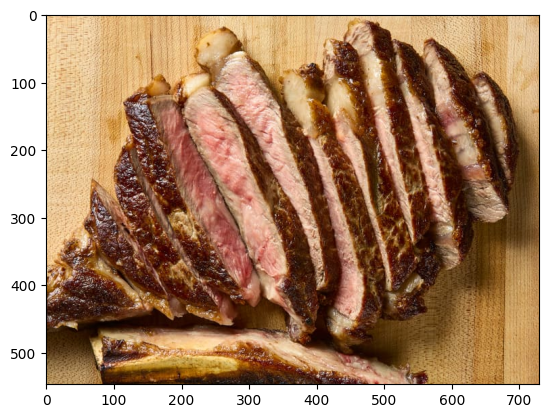

In [ ]:
# We can plot it by permuting it..
plt.imshow(custom_image_uint8.permute(1,2,0))

In [ ]:
# We have to convert the custom_image and convert it to torch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)
custom_image

tensor([[[243., 241., 235.,  ..., 201., 197., 171.],
         [235., 244., 252.,  ..., 205., 217., 203.],
         [243., 248., 245.,  ..., 213., 210., 205.],
         ...,
         [191., 206., 183.,  ..., 187., 175., 170.],
         [189., 203., 187.,  ..., 183., 192., 189.],
         [188., 199., 190.,  ..., 178., 196., 196.]],

        [[212., 209., 201.,  ..., 156., 151., 125.],
         [205., 212., 218.,  ..., 160., 171., 157.],
         [211., 216., 212.,  ..., 168., 165., 160.],
         ...,
         [156., 171., 150.,  ..., 131., 122., 119.],
         [154., 168., 154.,  ..., 127., 139., 138.],
         [153., 164., 157.,  ..., 122., 143., 145.]],

        [[165., 162., 153.,  ...,  89.,  89.,  65.],
         [155., 163., 170.,  ...,  93., 109.,  95.],
         [160., 165., 161.,  ..., 101., 100.,  95.],
         ...,
         [102., 117.,  96.,  ...,  80.,  70.,  66.],
         [100., 114., 100.,  ...,  76.,  87.,  85.],
         [ 99., 110., 103.,  ...,  71.,  91.,  92.]]]

In [ ]:
custom_image.shape

torch.Size([3, 547, 730])

In [ ]:
# Normalize the shape of the img value
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.
custom_image

tensor([[[0.9529, 0.9451, 0.9216,  ..., 0.7882, 0.7725, 0.6706],
         [0.9216, 0.9569, 0.9882,  ..., 0.8039, 0.8510, 0.7961],
         [0.9529, 0.9725, 0.9608,  ..., 0.8353, 0.8235, 0.8039],
         ...,
         [0.7490, 0.8078, 0.7176,  ..., 0.7333, 0.6863, 0.6667],
         [0.7412, 0.7961, 0.7333,  ..., 0.7176, 0.7529, 0.7412],
         [0.7373, 0.7804, 0.7451,  ..., 0.6980, 0.7686, 0.7686]],

        [[0.8314, 0.8196, 0.7882,  ..., 0.6118, 0.5922, 0.4902],
         [0.8039, 0.8314, 0.8549,  ..., 0.6275, 0.6706, 0.6157],
         [0.8275, 0.8471, 0.8314,  ..., 0.6588, 0.6471, 0.6275],
         ...,
         [0.6118, 0.6706, 0.5882,  ..., 0.5137, 0.4784, 0.4667],
         [0.6039, 0.6588, 0.6039,  ..., 0.4980, 0.5451, 0.5412],
         [0.6000, 0.6431, 0.6157,  ..., 0.4784, 0.5608, 0.5686]],

        [[0.6471, 0.6353, 0.6000,  ..., 0.3490, 0.3490, 0.2549],
         [0.6078, 0.6392, 0.6667,  ..., 0.3647, 0.4275, 0.3725],
         [0.6275, 0.6471, 0.6314,  ..., 0.3961, 0.3922, 0.

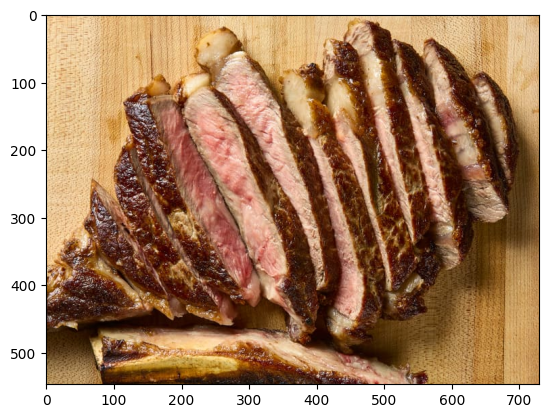

In [ ]:
# Chck if we have same image
plt.imshow(custom_image.permute(1,2,0))

In [ ]:
# Create a transform pipeline to resize image

from torchvision import transforms
custom_image_transform = transforms.Compose([
    transforms.Resize(size = (64,64))
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out shape
print(f"Original Shape {custom_image.shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")

Original Shape torch.Size([3, 547, 730])
Transformed shape: torch.Size([3, 64, 64])


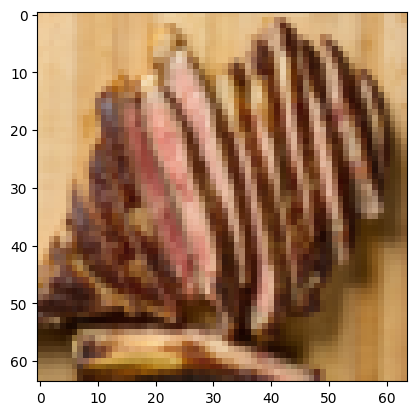

In [ ]:
# Check resized image..

plt.imshow(custom_image_transformed.permute(1,2,0))

Another way we can potentially improve our model's performance is if we increase the size of the training image data.

Instead of 64 by 53 we can upgrade our model's capability to deal with images that are 224 by 224

Recall our images that pass through our model has a batch dimension so this is Another place where we get shape mismatch issues as if our model because of What's going on in a neural network is a lot of tensor manipulation

If we don't play by the rules, the matrix multiplication will fail

Let's fix this by adding a batch dimension so we can do this by going a custom image transformed, Let squeeze it to the first dimension and check its shape.

When we make a prediction on a single custom image, we want to pass it to our model as an image or a batch of one sample.

In [ ]:
custom_image_transformed.shape,custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [ ]:
model_0.eval()
with torch.inference_mode():
  custom_image_pred = model_0(custom_image_transformed.unsqueeze(0))
custom_image_pred

tensor([[-0.8603,  1.6994, -2.2998]])

In [ ]:

class_names

['pizza', 'steak', 'sushi']

We get a prediction logit, because the raw outputs of our model, we get a logit value for each of our custom class, so this could be pizza,steak or sushi depending on the order of our classes.

Let's convert our logits into prediction probabilites then logits..

In [ ]:
custom_image_pred_probs = torch.softmax(custom_image_pred,dim = 1)
custom_image_pred_probs

tensor([[0.0706, 0.9127, 0.0167]])

In [ ]:
# Convert prediction probabilites -> Prediction labels
custom_image_pred_labels = torch.argmax(custom_image_pred_probs,dim = 1)
custom_image_pred_labels

tensor([1])

In [ ]:
class_names[custom_image_pred_labels]

'steak'

### Exercise 8 Solution:

Here is the actual proper way to write the solution for number 8, We had to functionize everything we've done in the above cells.

In [ ]:
from typing import List

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform = None):
  """ Makes a prediction on a target image with a trained model and plots the images and prediction """
  # Load in the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # Divide the image pixel values by 255 to get them between [0, 1]
  target_image = target_image / 255.

  # Transform if necessary.
  if transform:
    target_image = transform(target_image)

  # Make sure the model is on the target device
  model.to(device)

  # Turn on eval/inference mode and make a prediction
  model.eval()
  with torch.inference_mode():
     # Add an extra dimension to the image (this is the batch dimension e.g our model will predict on batches of 1x image)
     target_image = target_image.unsqueeze(0)

     # Make a prediction on the image with an extra dimension
     target_image_pred = model(target_image) # Also make sure the target image is on the right device

  # Convert logits -> Prediction probabilites
  target_image_pred_probs = torch.softmax(target_image_pred, dim = 1)

  # Convert prediction probabilities -> prediction labels
  target_image_pred_label = torch.argmax(target_image_pred_probs,dim = 1)

  # Plot the image alongside the prediction and prediction probability
  plt.imshow(target_image.squeeze().permute(1,2,0))
  if class_names:
    title = f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}"
  else:
    title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max():.3f}"
  plt.title(title)
  plt.axis(False)

This function is replicating everything we did above

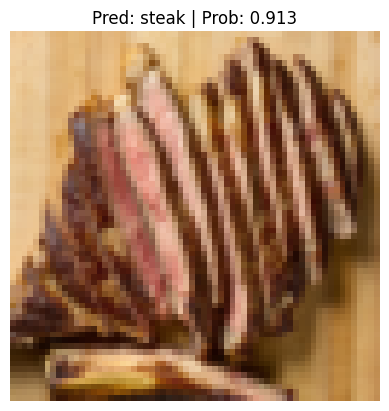

In [ ]:
# Pred on our custom image

pred_and_plot_image(model = model_0,
                    image_path = custom_image_path,
                    class_names = class_names,
                    transform = custom_image_transform)

## Fin